Data Cleaning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv", encoding = "latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5239,ham,"Jay wants to work out first, how's 4 sound?",NaN,NaN,NaN
5493,ham,I think if he rule tamilnadu..then its very to...,NaN,NaN,NaN
4022,ham,Well. Balls. Time to make calls,NaN,NaN,NaN
4297,spam,WELL DONE! Your 4* Costa Del Sol Holiday or å£...,NaN,NaN,NaN
5083,ham,Aiya we discuss later lar... Pick Ì_ up at 4 i...,NaN,NaN,NaN


In [5]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.rename(columns = {'v1' : 'Type', 'v2' : 'Text'}, inplace = True)
df

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['Type'] = encoder.fit_transform(df['Type'])
df.sample(5)

,Type,Text
1996,0,Lol boo I was hoping for a laugh
2715,0,Cool. I am &lt;#&gt; inches long. hope you l...
5479,0,Really do hope the work doesnt get stressful. ...
1093,0,Well the weather in cali's great. But its comp...
2698,1,FROM 88066 LOST å£12 HELP


In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep = 'first')
df

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
df.duplicated().sum()

0

In [14]:
df['Type'].value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

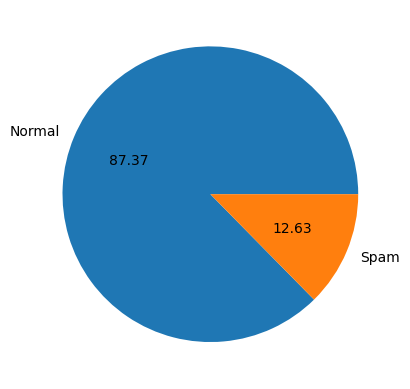

In [15]:
plt.pie(df['Type'].value_counts(), labels = ['Normal', 'Spam'], autopct = "%0.2f")
plt.show()

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rithi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['letters'] = df['Text'].apply(len)
df.sample(5)

C:\Users\rithi\AppData\Local\Temp\ipykernel_14324\614752441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['letters'] = df['Text'].apply(len)


,Type,Text,letters
3644,1,wamma get laid?want real doggin locations sent...,156
3895,1,tells u 2 call 09066358152 to claim å£5000 pri...,121
815,0,Where's my boytoy? I miss you ... What happened?,48
1511,0,Oops sorry. Just to check that you don't mind ...,110
901,0,How is it possible to teach you. And where.,43


In [18]:
df['words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.sample(5)

C:\Users\rithi\AppData\Local\Temp\ipykernel_14324\808846433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))


,Type,Text,letters,words
2213,0,"Goodmorning, today i am late for 2hrs. Because...",60,14
4864,0,I'm really sorry I lit your hair on fire,40,10
2916,0,Yes. that will be fine. Love you. Be safe.,42,13
18,0,Fine if thatåÕs the way u feel. ThatåÕs the wa...,58,14
3886,0,Cab is available.they pick up and drop at door...,53,11


In [19]:
df['sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.sample(5)

C:\Users\rithi\AppData\Local\Temp\ipykernel_14324\523407796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))


,Type,Text,letters,words,sentences
3192,0,I will lick up every drop :) are you ready to ...,69,18,1
2807,0,Yes princess! I want to catch you with my big ...,61,14,2
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
1408,0,"I've got ten bucks, jay is being noncomittal",44,10,1
4672,0,I forgot 2 ask Ì_ all smth.. There's a card on...,109,30,3


Exploratory Data Analysis

In [20]:
df.describe()

,Type,letters,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [21]:
df[df['Type'] == 0].describe()

,Type,letters,words,sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [22]:
df[df['Type']==1].describe()

,Type,letters,words,sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='letters', ylabel='Count'>

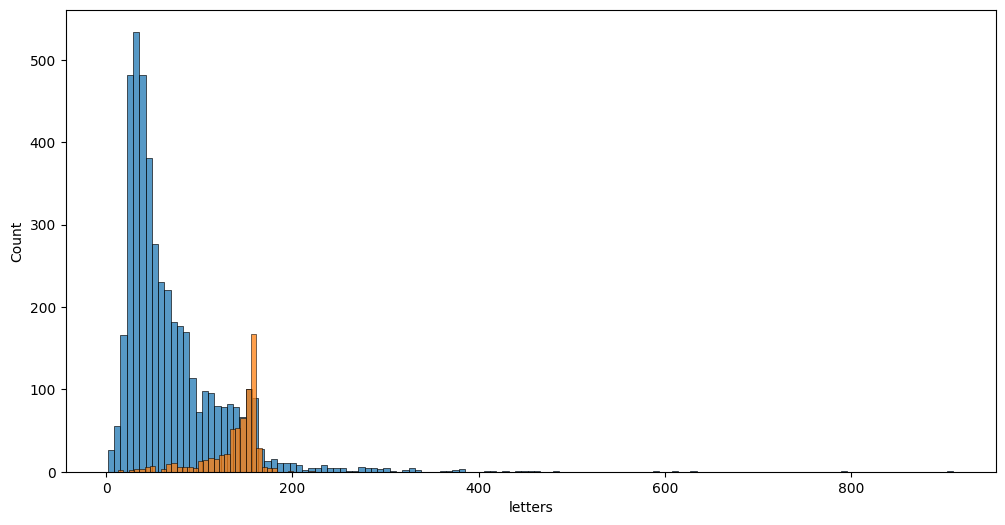

In [23]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Type'] == 0]['letters'])
sns.histplot(df[df['Type'] == 1]['letters'])

<Axes: xlabel='words', ylabel='Count'>

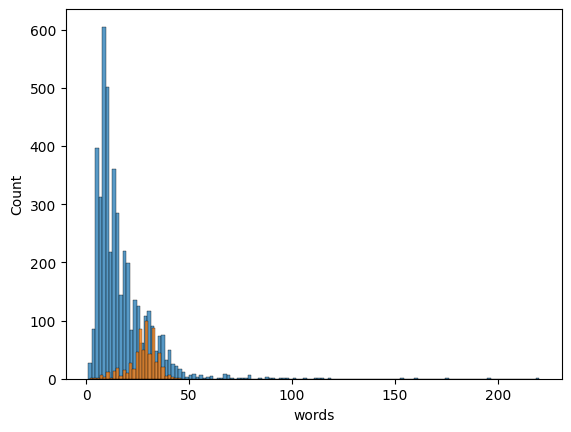

In [24]:
sns.histplot(df[df['Type'] == 0]['words'])
sns.histplot(df[df['Type'] == 1]['words'])

<Axes: xlabel='sentences', ylabel='Count'>

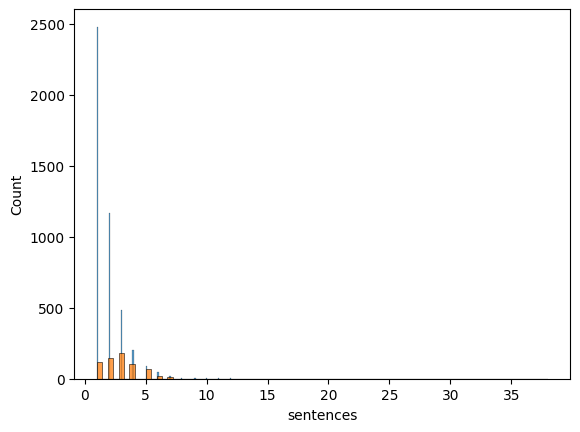

In [25]:
sns.histplot(df[df['Type'] == 0]['sentences'])
sns.histplot(df[df['Type'] == 1]['sentences'])

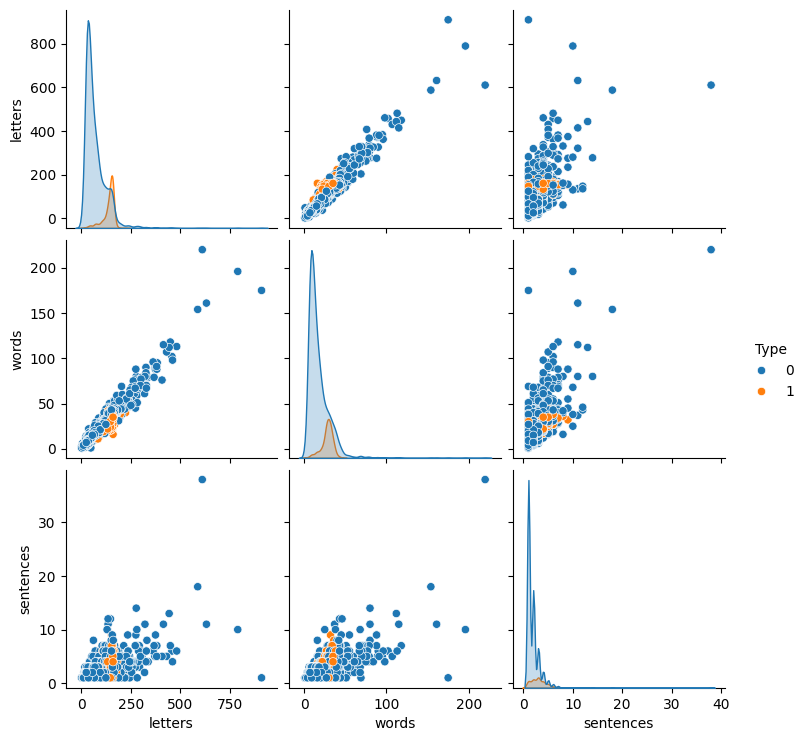

In [26]:
sns.pairplot(df,hue='Type')

<Axes: >

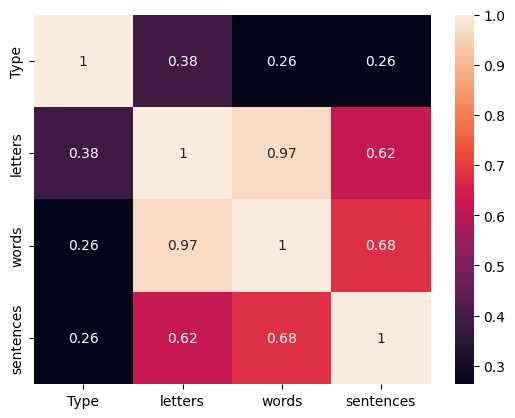

In [27]:
sns.heatmap(df[['Type','letters','words','sentences']].corr(),annot = True)

Data Preprocessing

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
ps = PorterStemmer()
def transformer(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    
    text = l[:]
    l = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
    text = l[:]
    l = []

    for i in text:
        l.append(ps.stem(i))
    
    text = l[:]
    l = []

    return " ".join(text)



In [31]:
df['new text'] = df['Text'].apply(transformer)
df.sample(5)

C:\Users\rithi\AppData\Local\Temp\ipykernel_14324\3286787369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new text'] = df['Text'].apply(transformer)


,Type,Text,letters,words,sentences,new text
1620,0,"Fuck babe, I miss you sooooo much !! I wish yo...",154,41,4,fuck babe miss sooooo much wish sleep bed lone...
5316,0,Jus finish watching tv... U?,28,7,1,ju finish watch tv u
1495,0,Hey gals.. Anyone of u going down to e driving...,58,14,2,hey gal anyon u go e drive centr tmr
1658,1,RGENT! This is the 2nd attempt to contact U!U ...,148,30,5,rgent 2nd attempt contact u u call 09071512433...
2209,0,"Hmm well, night night",22,5,1,hmm well night night


Building model

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

v = tfid.fit_transform(df['new text']).toarray()
v.shape

(5169, 3000)

In [33]:
from sklearn.model_selection import train_test_split

y = df['Type'].values
v_train,v_test,y_train,y_test = train_test_split(v,y,test_size=0.2,random_state=2)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [35]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

models = {'GaussianNB':gnb, 'MultinomialNB':mnb, 'BernoulliNB':bnb, 'SVC':svc, 'KNeighborsClassifier':knc, 'DecisionTreeClassifier':dtc, 'LogisticRegression':lrc, 'RandomForestClassifier':rfc, 'AdaBoostClassifier':abc, 'BaggingClassifier':bc, 'ExtraTreesClassifier':etc, 'GradientBoostingClassifier':gbc, 'XGBClassifier':xgb}


In [36]:
def train(cfr, x_train, y_train, x_test, y_test):
    cfr.fit(x_train, y_train)
    y_pred = cfr.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

accuracy_scores = []
precision_scores = []

In [37]:
for name, cfr in models.items():
    accuracy, precision = train(cfr, v_train, y_train, v_test, y_test)

    print('For ', name, ':')
    print('Accuracy Score : ', accuracy)
    print('Precision Score : ', precision)
    print(' ')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    

For  GaussianNB :
Accuracy Score :  0.8694390715667312
Precision Score :  0.5068493150684932
 
For  MultinomialNB :
Accuracy Score :  0.9709864603481625
Precision Score :  1.0
 
For  BernoulliNB :
Accuracy Score :  0.9835589941972921
Precision Score :  0.991869918699187
 
For  SVC :
Accuracy Score :  0.9758220502901354
Precision Score :  0.9747899159663865
 
For  KNeighborsClassifier :
Accuracy Score :  0.9052224371373307
Precision Score :  1.0
 
For  DecisionTreeClassifier :
Accuracy Score :  0.9448742746615088
Precision Score :  0.7913669064748201
 
For  LogisticRegression :
Accuracy Score :  0.9584139264990329
Precision Score :  0.9702970297029703
 
For  RandomForestClassifier :
Accuracy Score :  0.9758220502901354
Precision Score :  0.9829059829059829
 
For  AdaBoostClassifier :
Accuracy Score :  0.960348162475822
Precision Score :  0.9292035398230089
 
For  BaggingClassifier :
Accuracy Score :  0.9584139264990329
Precision Score :  0.8682170542635659
 
For  ExtraTreesClassifier :


In [38]:
performance = pd.DataFrame({
    "Model Name": models.keys(),
    "Accuracy Score": accuracy_scores,
    "Precision Score": precision_scores
})
performance

,Model Name,Accuracy Score,Precision Score
0,GaussianNB,0.869439,0.506849
1,MultinomialNB,0.970986,1.000000
2,BernoulliNB,0.983559,0.991870
3,SVC,0.975822,0.974790
4,KNeighborsClassifier,0.905222,1.000000
5,DecisionTreeClassifier,0.944874,0.791367
6,LogisticRegression,0.958414,0.970297
7,RandomForestClassifier,0.975822,0.982906
8,AdaBoostClassifier,0.960348,0.929204
9,BaggingClassifier,0.958414,0.868217


In [39]:
perf = pd.melt(performance, id_vars = 'Model Name')

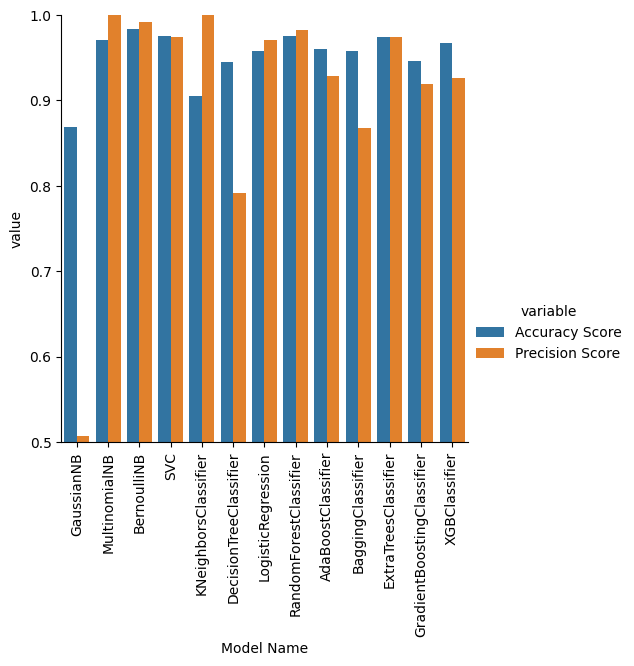

In [40]:
sns.catplot(perf, x = 'Model Name', y = 'value', hue = 'variable', kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators = [('mnb',mnb),('rfc',rfc),('etc',etc)], voting = 'soft')
voting.fit(v_train, y_train)
y_pred = voting.predict(v_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision : ", precision_score(y_test, y_pred))

Accuracy :  0.97678916827853
Precision :  0.9913793103448276


In [47]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl','wb'))
pickle.dump(voting, open('model.pkl','wb'))